In [1]:
import librosa

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
import sys
sys.path.insert(0, "../../")

In [3]:
from IPython import display
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [4]:
import matplotlib.pyplot as plt
plt.style.use("../../configs/white.mplstyle")

In [5]:
from omegaconf import OmegaConf
config = OmegaConf.load("../../configs/asr/quartznet.yaml")

In [6]:
from src.data.datasets import LibriSpeechDataset, LJSpeechDataset
from src.data.preprocessing.text import BaseTextEncoder
from src.visualization import plot_signal_transformation

In [7]:
text_encoder = BaseTextEncoder()
libri_speech_dataset = LibriSpeechDataset(config, text_encoder, part="dev-clean")

In [12]:
sample = libri_speech_dataset[1000]
sample

{'path': PosixPath('/Users/khaykingleb/Dropbox/Projects/Deep-Learning-for-Audio/resources/datasets/asr/libri_speech/dev-clean/3576/138058/3576-138058-0013.flac'),
 'text': 'sancho replied that all the trees were full of men s feet and legs',
 'encoded_text': tensor([[19.,  1., 14.,  3.,  8., 15.,  0., 18.,  5., 16., 12.,  9.,  5.,  4.,
           0., 20.,  8.,  1., 20.,  0.,  1., 12., 12.,  0., 20.,  8.,  5.,  0.,
          20., 18.,  5.,  5., 19.,  0., 23.,  5., 18.,  5.,  0.,  6., 21., 12.,
          12.,  0., 15.,  6.,  0., 13.,  5., 14.,  0., 19.,  0.,  6.,  5.,  5.,
          20.,  0.,  1., 14.,  4.,  0., 12.,  5.,  7., 19.]]),
 'audio': tensor([[-0.0002, -0.0013, -0.0007,  ..., -0.0052, -0.0025, -0.0014]]),
 'audio_duration': 4.715,
 'transformation': array([[[-20.023745, -18.177473, -21.333412, ..., -22.533577,
          -27.108902, -36.98477 ],
         [-19.676878, -17.36485 , -18.255169, ..., -21.490839,
          -26.68459 , -36.716995],
         [-18.556063, -13.595823, -10

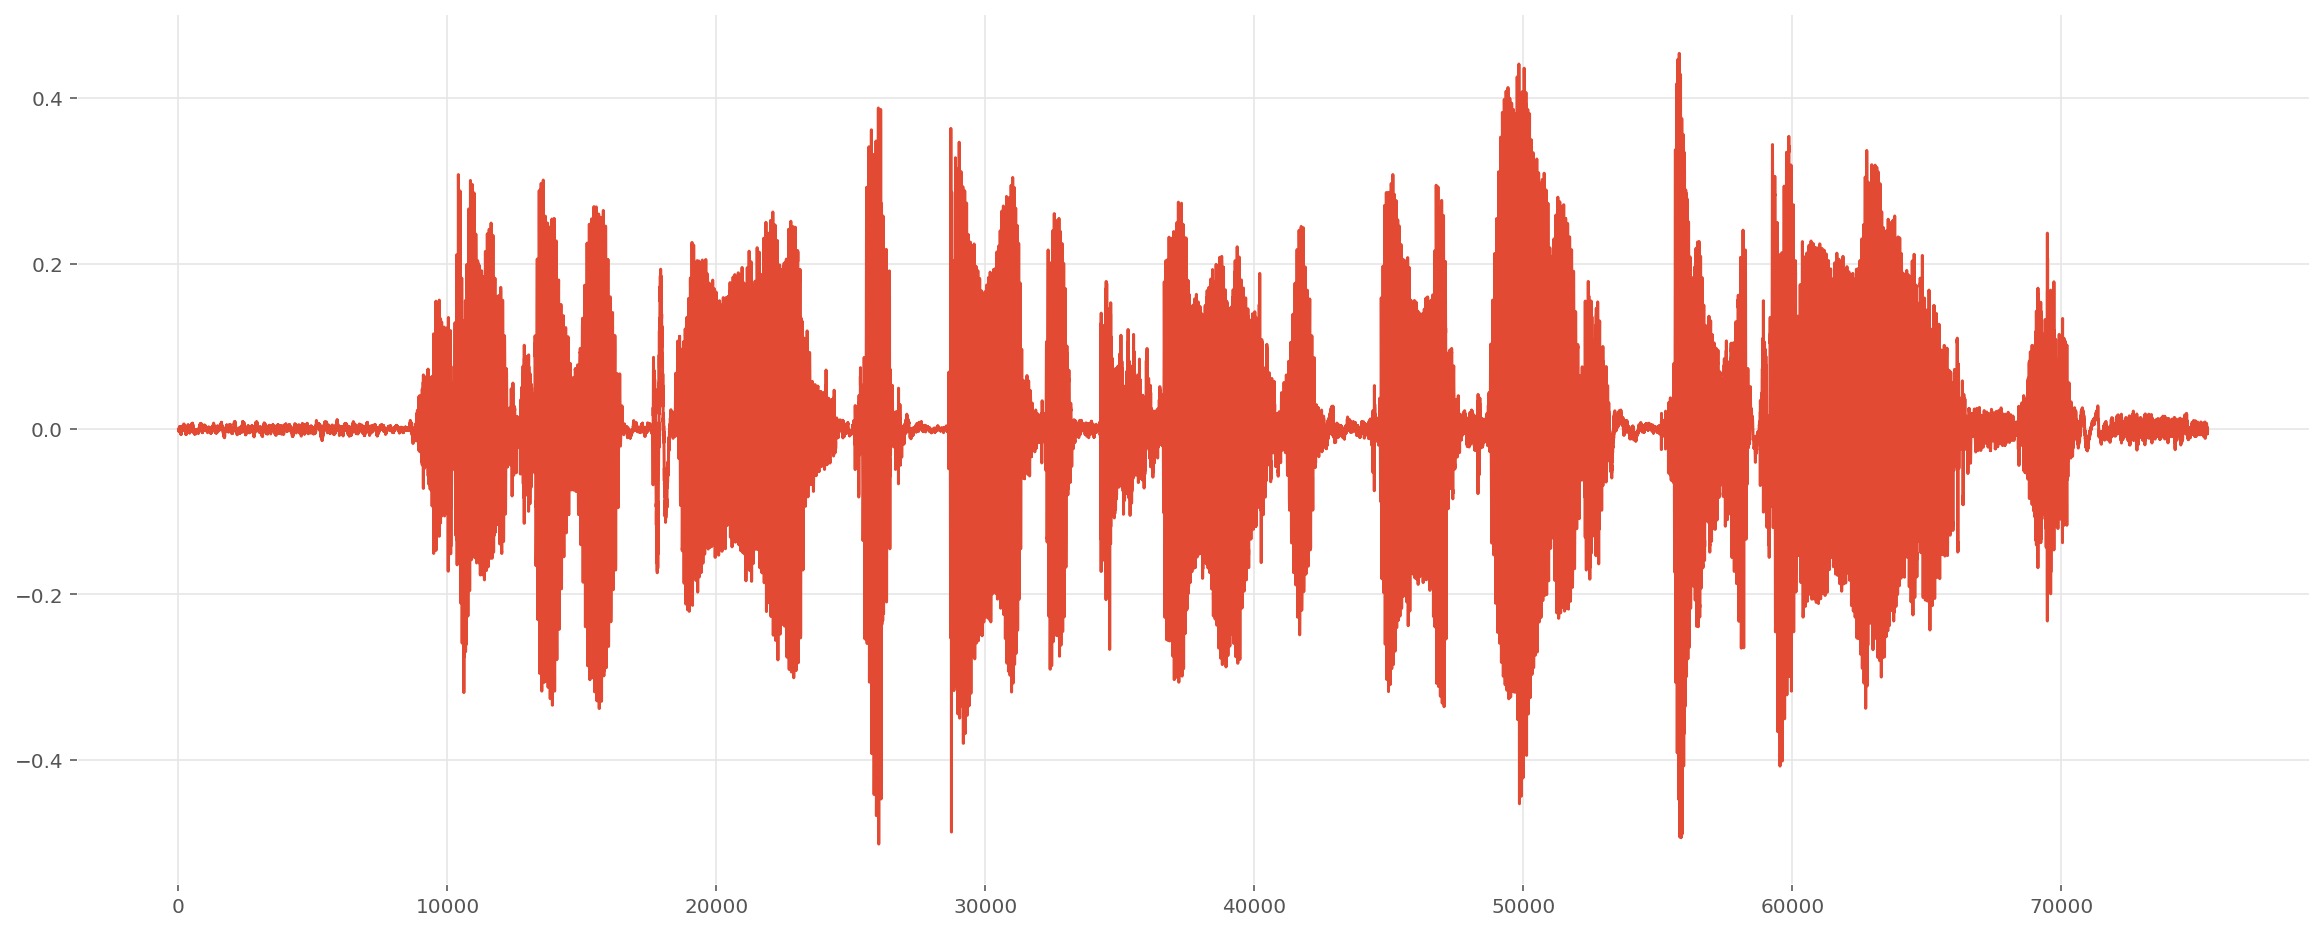

In [16]:
display.display(display.Audio(sample["audio"].squeeze().numpy(), rate=config.preprocess.audio.sr))
plt.figure(figsize=(20, 8))
plt.plot(sample["audio"].squeeze().numpy());

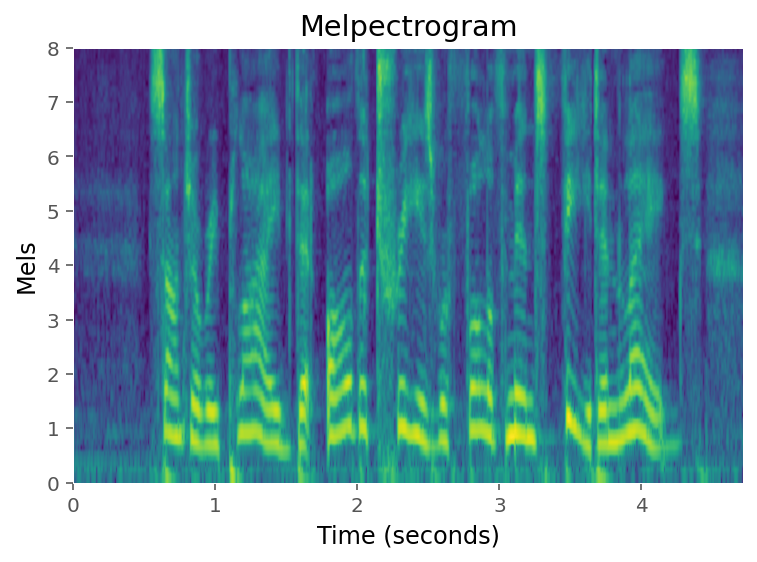

In [22]:
plot_signal_transformation(
    sample["transformation"].squeeze(),
    title="Melpectrogram",
    xlabel="Time (seconds)",
    ylabel="Mels",
    sample_rate=config.preprocess.audio.sr,
    audio_size=sample["audio"].squeeze().numpy().shape[0],    
)